In [1]:
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt

In [93]:
img = cv2.imread('screenshot.png', 0)

In [94]:
edges = cv2.Canny(img, 50, 150)

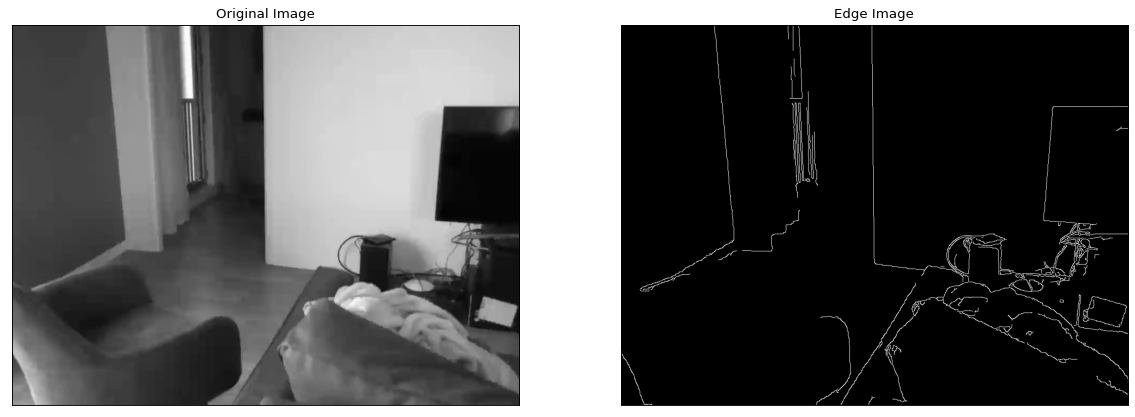

In [95]:
fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121),plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges, cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [96]:
lines = cv2.HoughLines(edges, 1, np.pi/180, 130)
print(lines.shape)
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    
    deg = theta * 180 / np.pi
    print(deg)
    
    if abs(deg - 180) < 10:
        cv2.line(img, (x1,y1), (x2,y2), (0,0,255), 2)

(9, 1, 2)
174.99999234780518
31.999999752116263
90.00000250447816
115.99999867453464
178.99999701257477
176.99999468018999
178.99999701257477
178.00000267657154
176.99999468018999


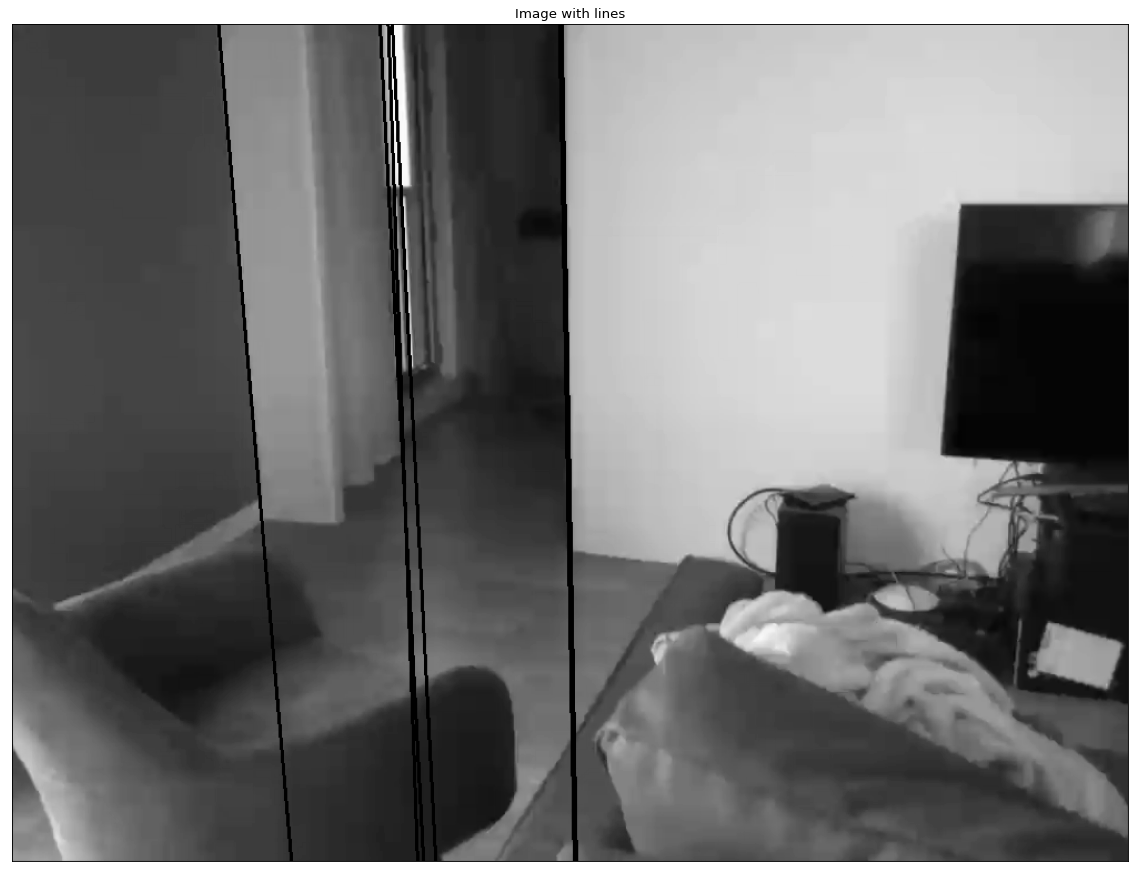

In [97]:
fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(img, cmap='gray')
plt.title('Image with lines'), plt.xticks([]), plt.yticks([])
plt.show()